In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirfilter, freqz, bilinear, butter, lfilter


BUTTER LOW PASS [ 1.         -1.99985783  0.99985784] [2.52643913e-09 5.05287826e-09 2.52643913e-09]
BUTTER BAND PASS [ 1.         -3.99997155  5.99991466 -3.99991468  0.99997157] [ 1.01063312e-10  0.00000000e+00 -2.02126624e-10  0.00000000e+00
  1.01063312e-10]
[[ 0.04658291  0.09316581  0.04658291  1.         -0.00736084  0.19560414]
 [ 1.         -2.          1.          1.         -0.88222871  0.33019575]
 [ 1.          2.          1.          1.          0.45753265  0.62453836]
 [ 1.         -2.          1.          1.         -1.39454092  0.74667242]]
HARMONIC LOW PASS [ 1.         -1.99985783  0.99985784] [2.52643913e-09 5.05287825e-09 2.52643913e-09]
HARMONIC BAND PASS [ 1.         -1.99998577  0.99998578] [3.57315306e-10 7.14630612e-10 3.57315306e-10]
HARMONIC*W BAND PASS [ 1.         -1.99998577  0.99998578] [ 7.10856215e-06  0.00000000e+00 -7.10856215e-06]


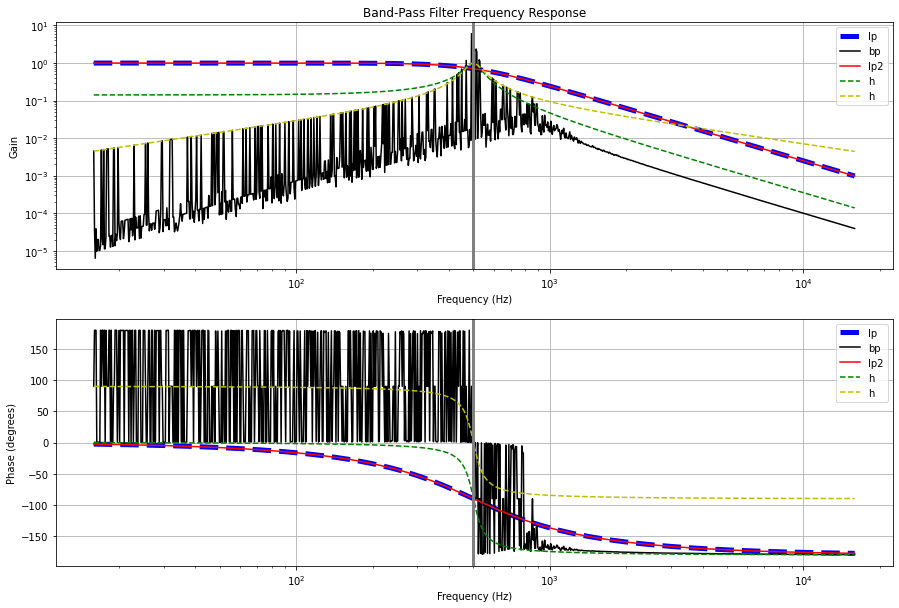

In [103]:
sf = 31.125e6  # Sampling frequency in Hz
sf = 125e6/4
f0 = 500  # Center frequency in Hz
Q = 10  # Bandwidth in Hz
nyq = sf / 2



plt.figure(figsize = (15,10))
plt.subplot(2, 1, 1)



# BUTTER LOW PASS
b, a = iirfilter(2, f0/nyq, btype='low', ftype='butter')
w, h = freqz(b, a, worN=np.logspace(2,5,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))
plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'b--', linewidth = 5, label='lp')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'b--', linewidth = 5, label='lp')
print('BUTTER LOW PASS', a,b)
#check_stability(a, b)

# BUTTER BAND PASS
b, a = iirfilter(2, [f0/nyq-f0/Q/nyq,f0/nyq+f0/Q/nyq], btype='band', ftype='butter')

w, h = freqz(b, a, worN=np.logspace(2,5,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))
plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'k', label='bp')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'k', label='bp')
print('BUTTER BAND PASS', a,b)
print(sos)

# HARMONIC LOW PASS
# Continuous-time transfer function coefficients
# H(s) = omega_0^2 / (s^2 + sqrt(2)* omega_0 * s + omega_0^2)
omega_0 = 2 * np.pi * f0
num = np.array([omega_0**2])  # numerator: [omega_0^2]
den = np.array([1, np.sqrt(2) * omega_0, omega_0**2]) # denominator: [1, 2 * zeta * omega_0, omega_0^2]
b, a = bilinear(num, den, sf)
w, h = freqz(b, a, worN=np.logspace(2,5,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))
plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'r', label='lp2')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'r', label='lp2')
print('HARMONIC LOW PASS', a,b)

# HARMONIC BAND PASS
# Continuous-time transfer function coefficients
# H(s) = omega_0^2 / (s^2 + 2 * zeta * omega_0 * s + omega_0^2)
omega_0 = 2 * np.pi * f0
num = np.array([omega_0**2])/Q*np.sqrt(2)  # numerator: [omega_0^2]
den = np.array([1, np.sqrt(2) * omega_0 /Q, omega_0**2])  # denominator: [1, 2 * zeta * omega_0, omega_0^2]
b, a = bilinear(num, den, sf)
w, h = freqz(b, a, worN=np.logspace(2,5,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))
plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'g--', label='h')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'g--', label='h')
print('HARMONIC BAND PASS', a,b)


# HARMONIC BAND PASS, times omega
# Continuous-time transfer function coefficients
# H(s) = omega_0^2 / (s^2 + 2 * zeta * omega_0 * s + omega_0^2)
omega_0 = 2 * np.pi * f0
num = np.array([0,omega_0,0])/Q*np.sqrt(2)  # numerator: [omega_0^2]
den = np.array([1, np.sqrt(2) * omega_0 /Q, omega_0**2])  # denominator: [1, 2 * zeta * omega_0, omega_0^2]
b, a = bilinear(num, den, sf)
w, h = freqz(b, a, worN=np.logspace(2,5,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))
plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'y--', label='h')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'y--', label='h')
print('HARMONIC*W BAND PASS', a,b)



plt.subplot(2, 1, 1)
plt.axvline(f0,linewidth =3, color='gray')
plt.title('Band-Pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.subplot(2, 1, 2)
plt.axvline(f0,linewidth =3, color='gray')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.legend()
plt.grid()
plt.xscale('log')

## check filter and stability

In [104]:

def check_stability(a_coeffs, b_coeffs):
    # Prepare the denominator (a) and numerator (b) polynomials for poles and zeros
    a_poly = a_coeffs#[1] + [-a for a in a_coeffs[1:]]
    b_poly = b_coeffs
    
    # Find the poles and zeros
    poles = np.roots(a_poly)
    zeros = np.roots(b_poly)
    
    # Check stability
    stable = np.all(np.abs(poles) < 1)
    
    # Print results
    print("Poles:", poles)
    print("Pole magnitudes:", np.abs(poles))
    print("Zeros:", zeros)
    print("Zero magnitudes:", np.abs(zeros))
    if stable:
        print("The filter is stable (all poles are within the unit circle).")
    else:
        print("The filter is unstable (some poles are on or outside the unit circle).")
    
    # Plot the poles and zeros
    plot_poles_zeros(poles, zeros)
    
    return stable

def plot_poles_zeros(poles, zeros):
    plt.figure(102)
    fig, ax = plt.subplots(figsize=(10, 6))
    # Draw unit circle
    unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(unit_circle)
    
    # Plot poles and zeros
    plt.scatter(np.real(poles), np.imag(poles), color='red', marker='x', s=100, label='Poles')
    plt.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', s=100, label='Zeros')
    
    # Formatting the plot
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Pole-Zero Plot")
    plt.legend()
    plt.grid()
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(0.9 , 1.1)
    plt.ylim(-0.1 , 0.1)
    plt.show()

    

def plot_iir_response(a_coeffs, b_coeffs, sf):
    
    
    # Rescale a and b coefficients to 32-bit integers
    a.astype('int32')
    b.astype('int32')
    
    # Compute frequency response
    w, h = freqz(b_coeffs, a_coeffs, worN=np.logspace(0, 7, 1000) / sf)
    angles = np.degrees(np.unwrap(np.angle(h)))
    
    # Plot magnitude response
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'b', label='Magnitude')
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Response')
    plt.legend()
    plt.grid(True)
    
    # Plot phase response
    plt.subplot(2, 1, 2)
    plt.plot(0.5 * sf * w / np.pi, angles, 'b', label='Phase')
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (degrees)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



BUTTER LOW PASS [ 1.         -1.99985783  0.99985784] [2.52643913e-09 5.05287826e-09 2.52643913e-09]


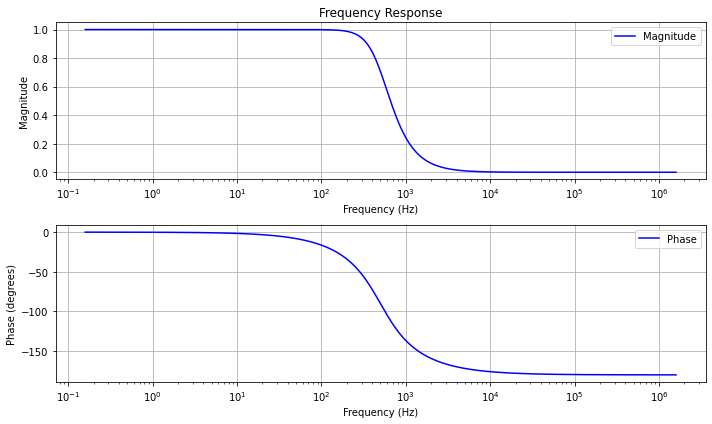

Poles: [0.99992891+7.10810738e-05j 0.99992891-7.10810738e-05j]
Pole magnitudes: [0.99992892 0.99992892]
Zeros: [-1. -1.]
Zero magnitudes: [1. 1.]
The filter is stable (all poles are within the unit circle).


<Figure size 432x288 with 0 Axes>

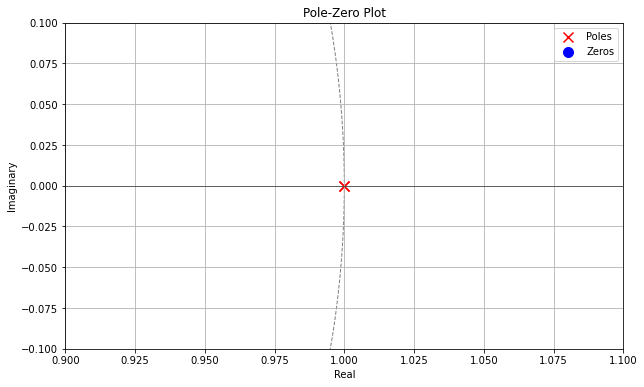

True

In [105]:
# BUTTER LOW PASS
b, a = iirfilter(2, f0/nyq, btype='low', ftype='butter')
print('BUTTER LOW PASS', a,b)
plot_iir_response(a,b,sf)
check_stability(a, b)

a

BUTTER BAND PASS [ 1.         -1.99997988  0.99997989] [ 1.00529954e-05  0.00000000e+00 -1.00529954e-05]


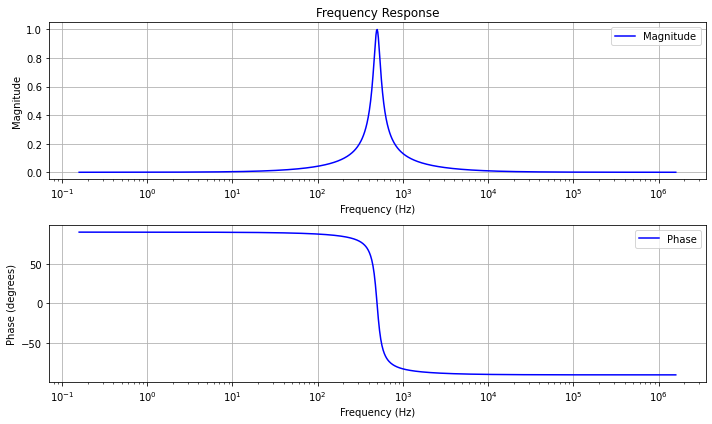

Poles: [0.99998994+9.95195762e-05j 0.99998994-9.95195762e-05j]
Pole magnitudes: [0.99998995 0.99998995]
Zeros: [-1.  1.]
Zero magnitudes: [1. 1.]
The filter is stable (all poles are within the unit circle).


<Figure size 432x288 with 0 Axes>

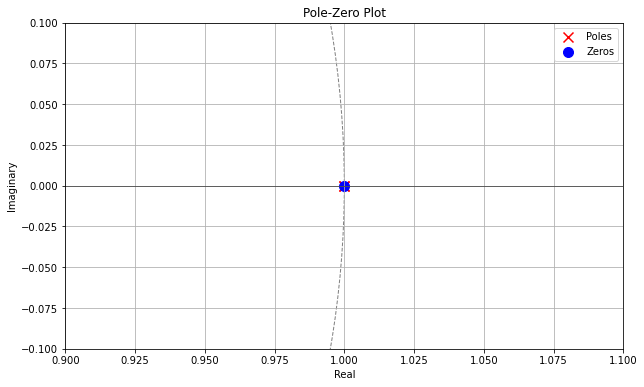

True

In [106]:
# BUTTER BAND PASS
b, a = iirfilter(1, [f0/nyq-f0/Q/nyq,f0/nyq+f0/Q/nyq], btype='band', ftype='butter')
print('BUTTER BAND PASS', a,b)
plot_iir_response(a,b,sf)
check_stability(a, b)

HARMONIC LOW PASS [ 1.         -1.99998577  0.99998578] [3.57315306e-10 7.14630612e-10 3.57315306e-10]


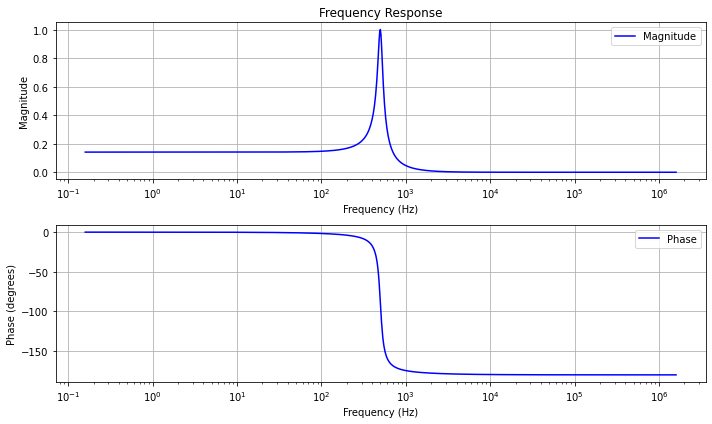

Poles: [0.99999289+0.00010028j 0.99999289-0.00010028j]
Pole magnitudes: [0.99999289 0.99999289]
Zeros: [-1. -1.]
Zero magnitudes: [1. 1.]
The filter is stable (all poles are within the unit circle).


<Figure size 432x288 with 0 Axes>

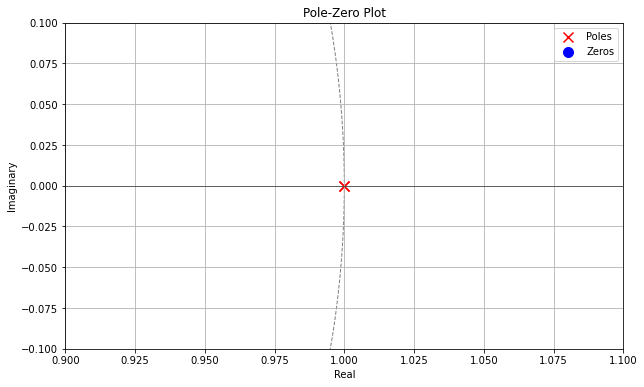

True

In [107]:
# HARMONIC BAND PASS
# Continuous-time transfer function coefficients
# H(s) = omega_0^2 / (s^2 + 2 * zeta * omega_0 * s + omega_0^2)
omega_0 = 2 * np.pi * f0
num = np.array([omega_0**2])/Q*np.sqrt(2)  # numerator: [omega_0^2]
den = np.array([1, np.sqrt(2) * omega_0 /Q, omega_0**2])  # denominator: [1, 2 * zeta * omega_0, omega_0^2]
b, a = bilinear(num, den, sf)

print('HARMONIC LOW PASS', a,b)
plot_iir_response(a,b,sf)
check_stability(a, b)

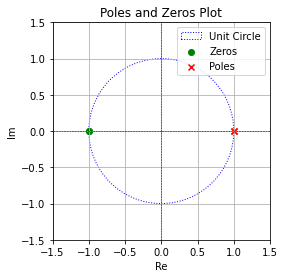

The filter is stable.


In [70]:
import numpy as np
import matplotlib.pyplot as plt

def check_stability_and_plot(a_coeffs, b_coeffs):
    """
    Checks the stability of an IIR filter and plots its poles and zeros on the z-plane.
    
    Parameters:
    - a_coeffs (list or ndarray): Coefficients of the denominator (a).
    - b_coeffs (list or ndarray): Coefficients of the numerator (b).
    
    Returns:
    - stable (bool): True if the filter is stable, False otherwise.
    """
    # Compute the poles and zeros
    poles = np.roots(a_coeffs)
    zeros = np.roots(b_coeffs)
    
    # Check stability: All poles must lie inside the unit circle
    stable = np.all(np.abs(poles) < 1)
    
    # Plot the unit circle and poles/zeros
    fig, ax = plt.subplots()
    unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dotted', label='Unit Circle')
    ax.add_artist(unit_circle)
    
    # Plot poles and zeros
    ax.scatter(np.real(zeros), np.imag(zeros), color='green', label='Zeros', marker='o')
    ax.scatter(np.real(poles), np.imag(poles), color='red', label='Poles', marker='x')
    
    # Set plot limits and labels
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.set_aspect('equal', 'box')
    ax.set_title('Poles and Zeros Plot')
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    ax.legend()
    plt.grid()
    plt.show()
    
    return stable

# Example usage:
a = [1, -1.99995975, 0.99995979]  # Example denominator coefficients
b = [2.01057887e-05, 0.0, -2.01057887e-05]  # Example numerator coefficients

omega_0 = 2 * np.pi * f0
num = np.array([omega_0**2])/Q*np.sqrt(2)  # numerator: [omega_0^2]
den = np.array([1, np.sqrt(2) * omega_0 /Q, omega_0**2])  # denominator: [1, 2 * zeta * omega_0, omega_0^2]
b, a = bilinear(num, den, sf)

stable = check_stability_and_plot(a, b)
print(f"The filter is {'stable' if stable else 'unstable'}.")


In [71]:
np.roots(a_coeffs)

array([0.9999899+9.99192506e-05j, 0.9999899-9.99192506e-05j])

In [94]:
1/32e-9

31249999.999999996

[ 0.00020102  0.         -0.00020102] [ 1.         -1.99959396  0.99959796]
b coefficients (feedforward): [ 215845       0 -215845]
a coefficients (feedback): [ 1073741824 -2147047661  1073310134]


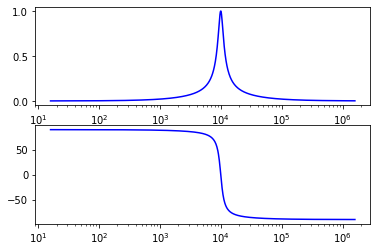

In [38]:
import numpy as np
from scipy import signal

# Define filter design parameters
cutoff_frequency = 1000  # in Hz
sampling_frequency = 31.125e6  # in Hz

# Normalize the frequency
normalized_cutoff = cutoff_frequency / (sampling_frequency / 2)

# Design the filter (1st order Butterworth Low-pass filter)

b, a = signal.butter(1, normalized_cutoff, btype='low', analog=False)

sf = 1/(8e-9*4)
nyq = sf/2


b, a = butter(1, 1000/nyq, btype='low', analog=False)

### FIRST ORDER BAND PASS FILTER ###
iir_dict = {}
scale_factor = 2**30
sf = 1/(8e-9*4)
nyq = sf/2
f0 = 10000
Q = 10
w0 = 2 * np.pi * f0 / sf
alpha = np.sin(w0) / (2 * Q)
cos_w0 = np.cos(w0)
b  = np.array([alpha, 0, -alpha]) 
a = np.array([1 + alpha, -2 * cos_w0, 1 - alpha])


b, a = iirfilter(1, [f0/nyq-f0/Q/nyq,f0/nyq+f0/Q/nyq], btype='band', ftype='butter')

#b=np.array([1,0,0])
#a=np.array([0,0,0])

print(b,a)
# Convert to fixed-point representation by scaling coefficients
scale_factor = 2**30  # Scaling factor to avoid underflow/overflow in fixed-point arithmetic
b = np.round(b * scale_factor).astype(int)
a = np.round(a * scale_factor).astype(int)

a[0] = 2**30



# Print the coefficients


print("b coefficients (feedforward):", b)
print("a coefficients (feedback):", a)



w, h = freqz(b, a, worN=np.logspace(2,7,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))

plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'b', label='lp')
#plt.axhline(np.sqrt(0.5))
#plt.axvline(cutoff_frequency)
#plt.yscale('log')
plt.xscale('log')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'b', label='lp')
plt.xscale('log')


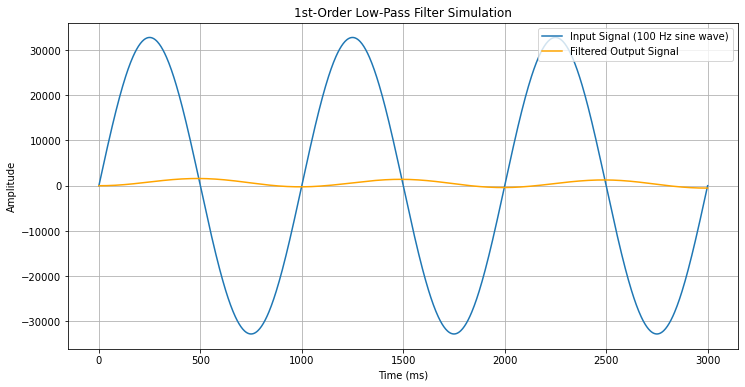

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Filter parameters
fc = 1           # Cutoff frequency in Hz
fs = 1/(10000*8e-9)     # Sampling frequency in Hz
data_bit_depth = 16 # Data bit depth (16-bit)
coeff_bit_depth = 30 # Coefficient precision (30-bit)

# Compute the filter coefficient
alpha = np.exp(-2 * np.pi * fc / fs)

# Convert alpha to the desired bit depth by truncating
alpha = np.round(alpha * (2**coeff_bit_depth)) / (2**coeff_bit_depth)

# Test signal: a low-frequency sine wave
frequency = 1  # Frequency of test signal in Hz
t = np.linspace(0, 3/frequency,1000)  # Time vector for 10 ms of data

input_signal = (np.sin(2 * np.pi * frequency * t) * (2**(data_bit_depth - 1) - 1)).astype(np.int16)

# Initialize the output signal array
output_signal = np.zeros_like(input_signal, dtype=np.int16)

# 1st-order low-pass filter
for i in range(1, len(input_signal)):
    output_signal[i] = (alpha * output_signal[i - 1] + (1 - alpha) * input_signal[i]).astype(np.int16)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t * 1000, input_signal, label="Input Signal (100 Hz sine wave)")
plt.plot(t * 1000,output_signal, label="Filtered Output Signal", color='orange')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("1st-Order Low-Pass Filter Simulation")
plt.legend()
plt.grid(True)
plt.show()


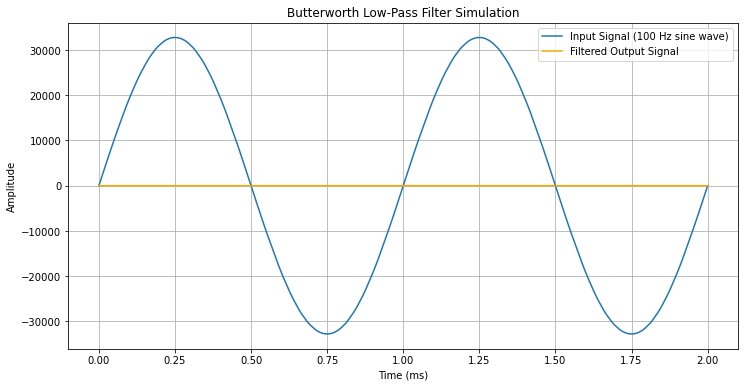

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirfilter, freqz, bilinear, butter



# User-defined Butterworth coefficients (replace these with your values)
# Example coefficients for a 1st-order Butterworth low-pass filter
b = [0.0008, 0.0008]  # Example numerator coefficients
a = [1.0, -0.9984]    # Example denominator coefficients

cutoff_frequency = 1000  # in Hz
sampling_frequency = 31.125e6  # in Hz

# Normalize the frequency
normalized_cutoff = cutoff_frequency / (sampling_frequency / 2)

# Design the filter (1st order Butterworth Low-pass filter)
b, a = signal.butter(1, normalized_cutoff, btype='low', analog=False)

f0 = 1000  # Center frequency in Hz
zeta = 0.1  # Bandwidth in Hz
nyq = fs/2


b, a = iirfilter(1, [f0/nyq-f0*zeta/nyq,f0/nyq+f0*zeta/nyq], btype='band', ftype='butter')


# Filter and signal parameters
fs = 1/(4*8e-9)      # Sampling frequency in Hz
data_bit_depth = 16   # Data bit depth (16-bit)
signal_frequency = 1000 # Frequency of the test signal in Hz

# Test signal: a low-frequency sine wave
t = np.arange(0, 2/signal_frequency, 1 / fs)  # Time vector for 10 ms of data
input_signal = (np.sin(2 * np.pi * signal_frequency * t) * (2**(data_bit_depth - 1) - 1)).astype(np.int16)

# Initialize the output signal array
output_signal = np.zeros_like(input_signal, dtype=np.int16)

# Apply the IIR filter using the a and b coefficients
for n in range(len(input_signal)):
    # Apply the filter difference equation
    output_signal[n] = sum(b[i] * input_signal[n - i] if n - i >= 0 else 0 for i in range(len(b)))
    output_signal[n] -= sum(a[i] * output_signal[n - i] if n - i >= 0 else 0 for i in range(1, len(a)))

# Convert output to 16-bit integer (simulating a real 16-bit output system)
output_signal = np.clip(output_signal, -2**(data_bit_depth - 1), 2**(data_bit_depth - 1) - 1).astype(np.int16)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t * 1000, input_signal, label="Input Signal (100 Hz sine wave)")
plt.plot(t * 1000, output_signal, label="Filtered Output Signal", color='orange')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Butterworth Low-Pass Filter Simulation")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import numpy as np

def check_stability(a_coeffs):
    # Reverse a_coeffs because np.roots expects highest degree first
    poly_coeffs = [1] + [-a for a in a_coeffs[1:]]
    
    # Find the roots (poles) of the denominator polynomial
    poles = np.roots(poly_coeffs)
    
    # Check if all poles are inside the unit circle
    stable = np.all(np.abs(poles) < 1)
    
    # Print results
    print("Poles:", poles)
    print("Pole magnitudes:", np.abs(poles))
    if stable:
        print("The filter is stable (all poles are within the unit circle).")
    else:
        print("The filter is unstable (some poles are on or outside the unit circle).")
    
    return stable

# Example coefficients for the denominator (a)
a_coeffs = [1, -0.5, 0.25]  # Example: corresponds to z^2 - 0.5z + 0.25
b, a_coeffs = iirfilter(1, [f0/nyq-f0*zeta/nyq,f0/nyq+f0*zeta/nyq], btype='band', ftype='butter')


# Run stability check
check_stability(a_coeffs)


Poles: [-2.41416499  0.41420524]
Pole magnitudes: [2.41416499 0.41420524]
The filter is unstable (some poles are on or outside the unit circle).


False

[ 1.         -1.99998572  0.99998573]
Poles: [-2.41418919  0.41420938]
Pole magnitudes: [2.41418919 0.41420938]
Zeros: [-1.  1.]
Zero magnitudes: [1. 1.]
The filter is unstable (some poles are on or outside the unit circle).


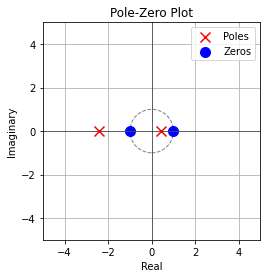

False

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def check_stability(a_coeffs, b_coeffs):
    # Prepare the denominator (a) and numerator (b) polynomials for poles and zeros
    a_poly = [1] + [-a for a in a_coeffs[1:]]
    b_poly = b_coeffs
    
    # Find the poles and zeros
    poles = np.roots(a_poly)
    zeros = np.roots(b_poly)
    
    # Check stability
    stable = np.all(np.abs(poles) < 1)
    
    # Print results
    print("Poles:", poles)
    print("Pole magnitudes:", np.abs(poles))
    print("Zeros:", zeros)
    print("Zero magnitudes:", np.abs(zeros))
    if stable:
        print("The filter is stable (all poles are within the unit circle).")
    else:
        print("The filter is unstable (some poles are on or outside the unit circle).")
    
    # Plot the poles and zeros
    plot_poles_zeros(poles, zeros)
    
    return stable

def plot_poles_zeros(poles, zeros):
    fig, ax = plt.subplots()
    # Draw unit circle
    unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(unit_circle)
    
    # Plot poles and zeros
    plt.scatter(np.real(poles), np.imag(poles), color='red', marker='x', s=100, label='Poles')
    plt.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', s=100, label='Zeros')
    
    # Formatting the plot
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Pole-Zero Plot")
    plt.legend()
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

# Example coefficients for the filter
a_coeffs = np.array([1, -0.5, 0.25])  # Example denominator coefficients
b_coeffs = np.array([0.5, 0.25])      # Example numerator coefficients

b_coeffs, a_coeffs = iirfilter(1, [f0/nyq-f0*zeta/nyq,f0/nyq+f0*zeta/nyq], btype='band', ftype='butter')
print(a)
# Run stability check and plot
check_stability(a_coeffs, b_coeffs)


In [79]:
f0 = 100  # Center frequency in Hz
zeta = 0.1  # Bandwidth in Hz
nyq = fs/2


b, a = iirfilter(1, [f0/nyq-f0*zeta/nyq,f0/nyq+f0*zeta/nyq], btype='band', ftype='butter')
b,a

(array([ 2.01061526e-06,  0.00000000e+00, -2.01061526e-06]),
 array([ 1.        , -1.99999598,  0.99999598]))

In [153]:
np.array([2**31-1]).astype('int32')

array([2147483647])

Poles of the filter:
Pole 1: (0.999989926815033+0.00019986345732346327j), Magnitude: 0.9999899467879347
Pole 2: (0.999989926815033-0.00019986345732346327j), Magnitude: 0.9999899467879347

Zeros of the filter:
Zero 1: -1.0, Magnitude: 1.0
Zero 2: 1.0, Magnitude: 1.0

The filter is stable (all poles are inside the unit circle).


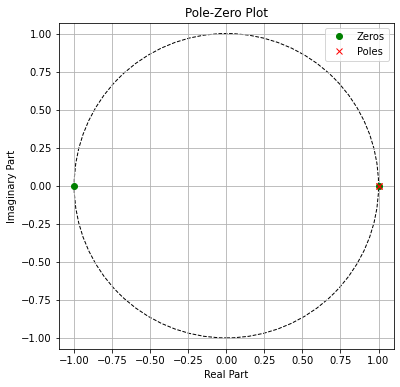

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Filter specifications (same as before)
fs = 1 / 32e-9        # Sampling frequency (31.25 MHz)
f0 = 1e3             # Center frequency (10 kHz)
Q = 10                # Quality factor

# Normalized angular frequency
w0 = 2 * np.pi * f0 / fs

# Calculate filter coefficients
alpha = np.sin(w0) / (2 * Q)
cos_w0 = np.cos(w0)

b0 = alpha
b1 = 0
b2 = -alpha
a0 = 1 + alpha
a1 = -2 * cos_w0
a2 = 1 - alpha

# Normalize coefficients (a0 should be 1)
b0 /= a0
b1 /= a0
b2 /= a0
a1 /= a0
a2 /= a0

# Form the numerator and denominator polynomials
numerator_coeffs = [b0, b1, b2]
denominator_coeffs = [1, a1, a2]

# Scale factor (same as in compute_coefficients.py)
scale = 1 << 30  # 2^31

# Calculate scaled coefficients (quantization to 32 bits)
b0_scaled = int(np.round(b0 * scale))
b1_scaled = int(np.round(b1 * scale))
b2_scaled = int(np.round(b2 * scale))
a1_scaled = int(np.round(a1 * scale))
a2_scaled = int(np.round(a2 * scale))

# Convert scaled integers back to floating-point coefficients
b0_quantized = b0_scaled / scale
b1_quantized = b1_scaled / scale
b2_quantized = b2_scaled / scale
a1_quantized = a1_scaled / scale
a2_quantized = a2_scaled / scale

# Form the numerator and denominator polynomials with quantized coefficients
numerator_coeffs = [b0_quantized, b1_quantized, b2_quantized]
denominator_coeffs = [1, a1_quantized, a2_quantized]

# Find the zeros and poles using quantized coefficients
zeros = np.roots(numerator_coeffs)
poles = np.roots(denominator_coeffs)

# Calculate the magnitudes of the poles and zeros
pole_magnitudes = np.abs(poles)
zero_magnitudes = np.abs(zeros)

# Display the results
print("Poles of the filter:")
for idx, pole in enumerate(poles, 1):
    print(f"Pole {idx}: {pole}, Magnitude: {pole_magnitudes[idx-1]}")

print("\nZeros of the filter:")
for idx, zero in enumerate(zeros, 1):
    print(f"Zero {idx}: {zero}, Magnitude: {zero_magnitudes[idx-1]}")

# Check stability
if np.all(pole_magnitudes < 1):
    print("\nThe filter is stable (all poles are inside the unit circle).")
else:
    print("\nThe filter is unstable (one or more poles are outside the unit circle).")

# Plot the unit circle and poles/zeros
plt.figure(figsize=(6, 6))
ax = plt.subplot(1,1,1)

# Draw unit circle
uc = plt.Circle((0,0), radius=1, fill=False, linestyle='--', color='black')
ax.add_artist(uc)

# Plot zeros
plt.plot(np.real(zeros), np.imag(zeros), 'go', label='Zeros')

# Plot poles
plt.plot(np.real(poles), np.imag(poles), 'rx', label='Poles')

# Set plot limits and labels
plt.title('Pole-Zero Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()


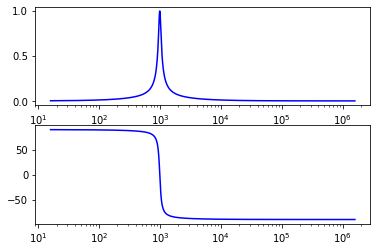

In [161]:
w, h = freqz(numerator_coeffs, denominator_coeffs, worN=np.logspace(2,7,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))

plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'b', label='lp')
#plt.yscale('log')
plt.xscale('log')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'b', label='lp')
plt.xscale('log')

Poles of the filter:
Pole 1: (0.9998894086379954+0.010027330523558376j), Magnitude: 0.9999396866130821
Pole 2: (0.9998894086379954-0.010027330523558376j), Magnitude: 0.9999396866130821

Zeros of the filter:
Zero 1: -1.0, Magnitude: 1.0
Zero 2: 1.0, Magnitude: 1.0

The filter is stable (all poles are inside the unit circle).


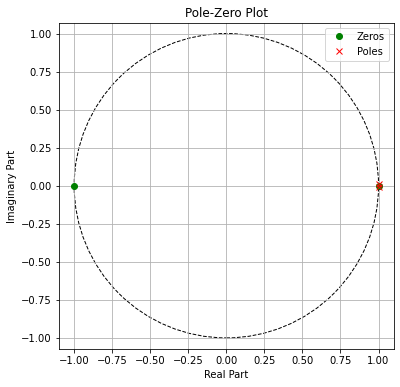

In [210]:
a = [2**26,-134210945,  67102117]
b = [ 67461,  0, -67461]

sf = 1/(8e-9*4)
nyq = sf/2
f0 = 50000
Q = 50
w0 = 2 * np.pi * f0 / sf
alpha = np.sin(w0) / (2 * Q)
cos_w0 = np.cos(w0)
b  = np.array([alpha, 0, -alpha]) 
a = np.array([1 + alpha, -2 * cos_w0, 1 - alpha])

#b = (b*2**63)
#a = (a*2**63)



#############################


numerator_coeffs = [b[0]/a[0], b[1]/a[0], b[2]/a[0]]
denominator_coeffs = [a[0]/a[0], a1/a[0], a2/a[0]]

# Find the zeros and poles using quantized coefficients
zeros = np.roots(numerator_coeffs)
poles = np.roots(denominator_coeffs)

# Calculate the magnitudes of the poles and zeros
pole_magnitudes = np.abs(poles)
zero_magnitudes = np.abs(zeros)

# Display the results
print("Poles of the filter:")
for idx, pole in enumerate(poles, 1):
    print(f"Pole {idx}: {pole}, Magnitude: {pole_magnitudes[idx-1]}")

print("\nZeros of the filter:")
for idx, zero in enumerate(zeros, 1):
    print(f"Zero {idx}: {zero}, Magnitude: {zero_magnitudes[idx-1]}")

# Check stability
if np.all(pole_magnitudes < 1):
    print("\nThe filter is stable (all poles are inside the unit circle).")
else:
    print("\nThe filter is unstable (one or more poles are outside the unit circle).")

# Plot the unit circle and poles/zeros
plt.figure(figsize=(6, 6))
ax = plt.subplot(1,1,1)

# Draw unit circle
uc = plt.Circle((0,0), radius=1, fill=False, linestyle='--', color='black')
ax.add_artist(uc)

# Plot zeros
plt.plot(np.real(zeros), np.imag(zeros), 'go', label='Zeros')

# Plot poles
plt.plot(np.real(poles), np.imag(poles), 'rx', label='Poles')

# Set plot limits and labels
plt.title('Pole-Zero Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()


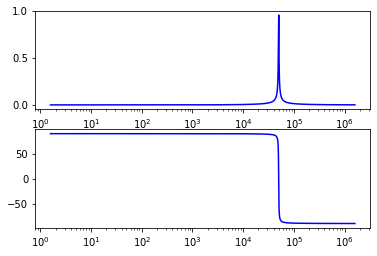

In [262]:
a = [2**26,-134210945,  67102117]
b = [ 67461,  0, -67461]

sf = 1/(8e-9*4)
nyq = sf/2
f0 = 50000
Q = 50
w0 = 2 * np.pi * f0 / sf
alpha = np.sin(w0) / (2 * Q)
cos_w0 = np.cos(w0)
b  = np.array([alpha, 0, -alpha]) 
a = np.array([1 + alpha, -2 * cos_w0, 1 - alpha])

scale_factor = 2**26/a[0]

b = (b * scale_factor).astype('int32')
a = (a* scale_factor).astype('int32')

numerator_coeffs = [b[0], b[1], b[2]]
denominator_coeffs = [a[0], a[1], a[2]]




w, h = freqz(numerator_coeffs, denominator_coeffs, worN=np.logspace(1,7,1000)/sf)
angles = np.degrees(np.unwrap(np.angle(h)))

plt.subplot(2, 1, 1)
plt.plot(0.5 * sf * w / np.pi, np.abs(h), 'b', label='lp')
#plt.yscale('log')
plt.xscale('log')
plt.subplot(2, 1, 2)
plt.plot(0.5 * sf * w / np.pi, angles, 'b', label='lp')
plt.xscale('log')

In [263]:
a,b

(array([  67108864, -134197454,   67095372]), array([ 6745,     0, -6745]))

In [248]:
denominator_coeffs, numerator_coeffs

([1.0, -1.9996979093239262, 0.9997989588413188],
 [0.00010051312950891752, 0.0, -0.00010051312950891752])

In [244]:
denominator_coeffs, numerator_coeffs

([1.0001005232334137, -1.9998989254236221, 0.9998994618654251],
 [0.00010052323341369629, 0.0, -0.00010052323341369629])

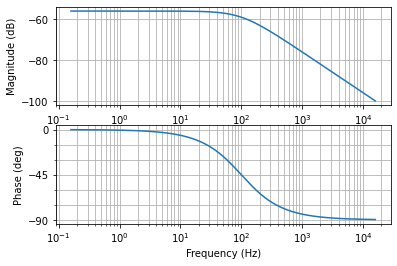

Discrete-time transfer function (Hz):

4.984e-06 z + 4.984e-06
-----------------------
      z - 0.9937

dt = 1e-05



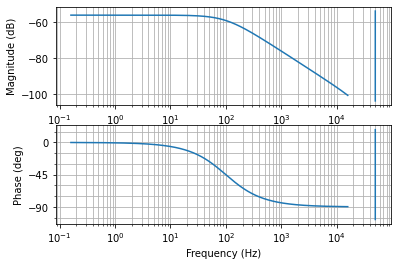

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode
import control as ctrl

# Define characteristics of the filter
fc = 100  # Cutoff frequency in Hz
wc = 2 * np.pi * fc  # Angular frequency

# Continuous-time transfer function of the low-pass single-pole filter
num = [1]  # Numerator coefficients
den = [1, wc]  # Denominator coefficients
hs = ctrl.TransferFunction(num, den)

# Bode plot for the continuous-time system
w, mag, phase = ctrl.bode(hs, dB=True, Hz=True, omega_limits=(1, 1e5), omega_num=1000)
plt.show()

# Sampling frequency
fs = 100e3  # Sampling frequency in Hz
ts = 1 / fs  # Sampling period

# Discretization using the Tustin method
hz = ctrl.sample_system(hs, ts, method='tustin')

# Display discrete-time transfer function
print("Discrete-time transfer function (Hz):")
print(hz)

# Optional: plot Bode diagram of discrete-time system
w_z, mag_z, phase_z = ctrl.bode(hz, dB=True, Hz=True, omega_limits=(1, 1e5), omega_num=1000)

# Show the plots
plt.show()


In [11]:
hz.num[0][0], hz.den[0][0] 

(array([4.98434123e-06, 4.98434123e-06]), array([ 1.        , -0.99373649]))

Float Coefficients:
Numerator: [0.00313176 0.00313176]
Denominator: [ 1.         -0.99373647]

Fixed-Point Coefficients:
Numerator: [0.00313176 0.00313176]
Denominator: [ 1.         -0.99373647]


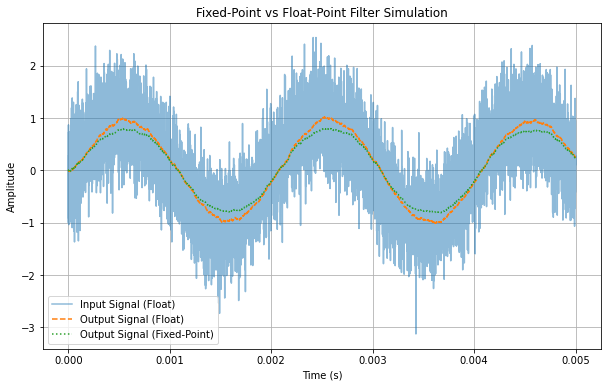

In [1]:
import numpy as np
from scipy.signal import butter, lfilter
from fxpmath import Fxp
import matplotlib.pyplot as plt

# Parameters
fs = 1e6  # Sampling frequency (Hz)
fc = 1000    # Cutoff frequency (Hz)
order = 1   # Filter order
n_bits = 32  # Fixed-point word length
frac_bits = 31  # Fractional bits (Q1.15 format)

# Step 1: Design the filter using scipy.signal.butter
num, den = butter(order, fc / (fs / 2), btype='low', analog=False)
print("Float Coefficients:")
print("Numerator:", num)
print("Denominator:", den)

# Step 2: Convert coefficients to fixed-point using fxpmath
num_fixed = Fxp(num, True, n_bits, frac_bits)  # Fixed-point numerator
den_fixed = Fxp(den, True, n_bits, frac_bits)  # Fixed-point denominator

print("\nFixed-Point Coefficients:")
print("Numerator:", num_fixed)
print("Denominator:", den_fixed)

# Step 3: Simulate a fixed-point filter
# Generate a test input signal (sine wave with noise)
t = np.linspace(0, 0.005, int(fs * 0.01), endpoint=False)  # 10ms of data
input_signal = np.sin(2 * np.pi * 500 * t) + 0.5 * np.random.randn(len(t))  # 50 Hz sine + noise

# Fixed-point variables for input and output
input_fixed = Fxp(input_signal, True, n_bits, frac_bits)
output_fixed = Fxp(np.zeros_like(input_signal), True, n_bits, frac_bits)

# Filter simulation in fixed-point (Direct Form I)
for i in range(2, len(input_signal)):
    # Apply difference equation in fixed-point arithmetic
    output_fixed[i] = (
        num_fixed[0] * input_fixed[i]
        + num_fixed[1] * input_fixed[i - 1]
        - den_fixed[1] * output_fixed[i - 1]
    )

# Step 4: Compare Fixed-Point vs Float-Point Output
# Float-point output using scipy.signal.lfilter for comparison
output_float = lfilter(num, den, input_signal)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(t, input_signal, label="Input Signal (Float)", alpha=0.5)
plt.plot(t, output_float, label="Output Signal (Float)", linestyle="--")
plt.plot(t, output_fixed.astype(float), label="Output Signal (Fixed-Point)", linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Fixed-Point vs Float-Point Filter Simulation")
plt.legend()
plt.grid()
plt.show()


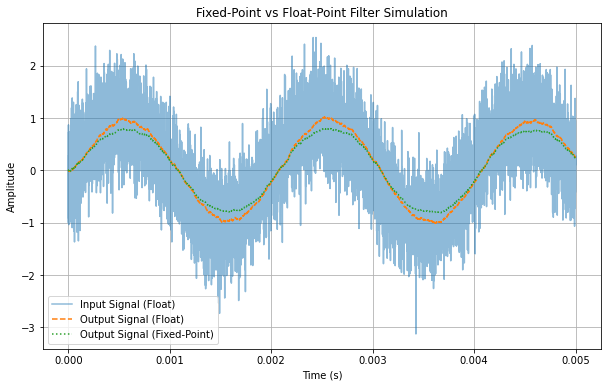

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(t, input_signal, label="Input Signal (Float)", alpha=0.5)
plt.plot(t, output_float, label="Output Signal (Float)", linestyle="--")
plt.plot(t, output_fixed.astype(float), label="Output Signal (Fixed-Point)", linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Fixed-Point vs Float-Point Filter Simulation")
plt.legend()
plt.grid()
plt.show()


In [4]:
output_fixed = Fxp(np.zeros_like(input_signal), True, n_bits, frac_bits)


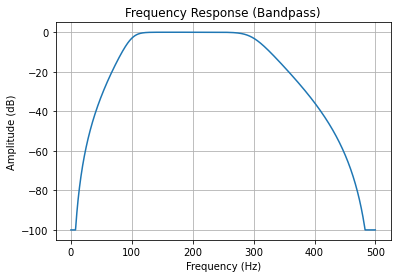

Numerator (b): [ 0.04658291  0.         -0.18633163  0.          0.27949744  0.
 -0.18633163  0.          0.04658291]
Denominator (a): [ 1.         -1.82659783  2.09900939 -1.85529307  1.55602106 -0.88541195
  0.38820501 -0.11579345  0.03011888]


In [85]:
import numpy as np
from scipy.signal import butter, sosfreqz, sos2tf, tf2sos
import matplotlib.pyplot as plt

# Design a Butterworth bandpass filter in SOS format
def design_butterworth_bandpass(order, cutoff_freqs, fs):
    """
    Designs a Butterworth bandpass filter and returns its coefficients.

    Parameters:
        order (int): The order of the Butterworth filter.
        cutoff_freqs (list): The cutoff frequencies [low, high] in Hz.
        fs (float): The sampling frequency in Hz.

    Returns:
        sos (ndarray): Second-order sections (SOS) of the filter.
    """
    # Normalize cutoff frequencies to Nyquist frequency
    nyquist = fs / 2
    normalized_cutoffs = [freq / nyquist for freq in cutoff_freqs]

    # Get filter coefficients in SOS format
    sos = butter(order, normalized_cutoffs, btype='bandpass', output='sos')
    return sos

# Convert SOS to transfer function (TF) form for inspection
def sos_to_tf(sos):
    """
    Converts Second-Order Sections (SOS) to Transfer Function (TF) form.

    Parameters:
        sos (ndarray): Second-order sections of the filter.

    Returns:
        b, a (ndarray): Numerator and denominator coefficients of the filter.
    """
    b, a = sos2tf(sos)
    return b, a

# Example: Design a bandpass filter
fs = 1000  # Sampling frequency in Hz
cutoff_freqs = [100, 300]  # Bandpass range: 100 Hz to 300 Hz
order = 4  # Filter order

# Get SOS representation
sos = design_butterworth_bandpass(order, cutoff_freqs, fs)

# Convert SOS to Transfer Function
b, a = sos_to_tf(sos)

# Adjust coefficients to avoid b[1] = 0
#b[0][1] = b[0][1] + 1e-8  # Add a small value to ensure b[1] is non-zero

# Plot the frequency response
def plot_frequency_response(sos, fs):
    """
    Plots the frequency response of a filter given its SOS representation.
    """
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    plt.figure()
    plt.plot(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
    plt.title("Frequency Response (Bandpass)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.show()

plot_frequency_response(sos, fs)

# Display numerator and denominator coefficients
print("Numerator (b):", b)
print("Denominator (a):", a)
